# Exploration of the PROSPER LOAN data
### by Abdulmaleek Mubaraq
# Table of contents


 1. [Preliminary Wrangling](#Preliminary_Wrangling)
 2. [Dataset structure](#Dataset_structure)
 3. [Questions for the dataset](#Questions)
 4. [Univariate Exploration](#Univariate_Exploration)
 5. [Univariate exploration report](#Univariate_exploration_report)
 6. [Bivariate exploration](#Bivariate_exploration)
 7. [Bivariate exploration report(question 1&2)](#Bivariate_exploration_report)
 8. [Multivariate Exploration](#Multivariate_Exploration)
 9. [Answering question 3](#Answering_question3)
 10. [Multivariate Exploration Report](#Multivariate_exploration_report)
 11. [Conclusions](#conclusions)



## Introduction



##  Preliminary Wrangling <a id="Preliminary_Wrangling">
 Importing libraries and packages

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#### Loading and assessing the dataset's properties

In [2]:
loan_df = pd.read_csv('prosperLoanData.csv')
#creating a copy of the dataset for wrangling
loan_copy=loan_df.copy()
loan_copy.head()


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
loan_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
# checking the significance of the Date variables in the dataset
loan_copy[['ListingCreationDate','ClosedDate','LoanOriginationDate','DateCreditPulled']]


,ListingCreationDate,ClosedDate,LoanOriginationDate,DateCreditPulled
0,2007-08-26 19:09:29.263000000,2009-08-14 00:00:00,2007-09-12 00:00:00,2007-08-26 18:41:46.780000000
1,2014-02-27 08:28:07.900000000,NaN,2014-03-03 00:00:00,2014-02-27 08:28:14
2,2007-01-05 15:00:47.090000000,2009-12-17 00:00:00,2007-01-17 00:00:00,2007-01-02 14:09:10.060000000
3,2012-10-22 11:02:35.010000000,NaN,2012-11-01 00:00:00,2012-10-22 11:02:32
4,2013-09-14 18:38:39.097000000,NaN,2013-09-20 00:00:00,2013-09-14 18:38:44
5,2013-12-14 08:26:37.093000000,NaN,2013-12-24 00:00:00,2013-12-14 08:26:40
6,2013-04-12 09:52:56.147000000,NaN,2013-04-18 00:00:00,2013-04-12 09:52:53
7,2013-05-05 06:49:27.493000000,NaN,2013-05-13 00:00:00,2013-05-05 06:49:25
8,2013-12-02 10:43:39.117000000,NaN,2013-12-12 00:00:00,2013-12-02 10:43:39
9,2013-12-02 10:43:39.117000000,NaN,2013-12-12 00:00:00,2013-12-02 10:43:39


In [5]:
print(loan_copy.LoanOriginationDate.min(),loan_copy.LoanOriginationDate.max())

2005-11-15 00:00:00 2014-03-12 00:00:00


>This lets me know that credit pulling and listing comes before loan origination and then closing date for closed loans and that the dataset bcontains listings from november 2005 and marchj 2014

In [6]:
loan_copy.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


##  Dataset structure <a id="Dataset_structure"> 

> The dataset holds information about 113937 loan listings with one listing per row. Data about each listing are recorded across 81 seperate variables(column), some of which includes :
1. 3 loan identification fields with unique values (LoanKey, ListingKey and ListingNumber)
2. 12 basic loan information fields(CreditGrade, Term, LoanStatus, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric) ,ProsperRating (Alpha), ProsperScore, ListingCategory)
4. 8 fields holding member bio like member key, occupation and employment information and wether the member belong in a group
5. 4 date fields (ListingCreationDate, ClosedDate, LoanOriginationDate and DateCreditPulled). these date fields divided other data about each listing into events as most data were collected as at loan listing whhile some were collected between loan listing date and loan origination and others were colected during credit pull. 
6. 22 columns holding informations collected during credit pull which includes information about borrower's credit score range, credit inquiries, revolving accounts,debt to income ration, credit lines, public records, trades and bank card credits.
7. 10 fields with information received during loan listing including income range , verified income and details of prosper loans 
8. 15 fields with details about loans that ended up getting charged off
9. 5 columns with loan funding and investment details

###  Questions for the dataset<a id="Questions"> 
1. Which set features has the most highest listings in the dataset 
2. Which of these features has the highest average loan amount 
3. Which features has the most charge off rate 

### Features of interest based on exploration goals
> Question 2 main feature :  LoanOriginalAmount <br> Question 3 main feature :  LoanStatus, which will be used to investigate loans that ended up being charged off, as we're trying to find out  which features has the highest charge off rate

### Supporting variables for exploration
> For finding out features with the highest number of listings and average loan amount these chosen variables from the dataset will be explored:<br> 'CurrentlyInGroup','EmploymentStatusDuration','IncomeVerifiable','IsBorrowerHomeowner','OpenCreditLines','OpenRevolvingAccounts' 
 <br><br>Charged off loans will be compared with that of completed loans, for this reason fields that are relevant for both categories will be explored. some of these fields include  IncomeRange, listing category, CreditScoreRangeLower, OpenRevolvingMonthlyPayment, and  LoanOriginalamount

##  Univariate Exploration<a id="Univariate_Exploration"> 


### Exploring the distribution of the main and supporting variables for all 3 questions 



### What is the distribution of the Loan status? (main variable for question 3)

Text(0,0.5,'percentage %')

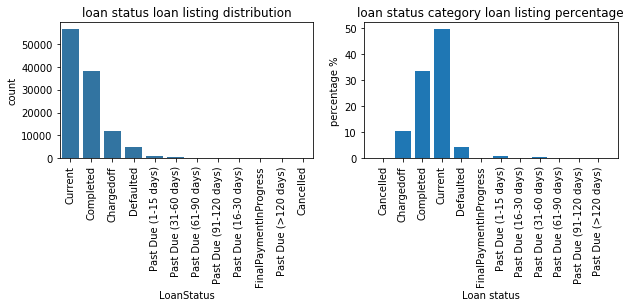

In [7]:
#changing income range and loanstatus columns to categorical types 
ordinal_variables = {'LoanStatus': ['Current',  'Past Due (1-15 days)', 'Past Due (16-30 days)', 
        'Past Due (61-90 days)', 'Past Due (31-60 days)','Past Due (91-120 days)', 
        'Past Due (>120 days)','FinalPaymentInProgress','Defaulted','Cancelled','Chargedoff','Completed'],
                    'IncomeRange': ['Not employed','Not displayed','$0','$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+' ]}

for x in ordinal_variables:
    column_order = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_variables[x])
    loan_copy[x] = loan_copy[x].astype(column_order)
# what is the distribution of the loan status (main variable) 
plt.figure(figsize=[10,2.5])
plt.subplot(1,2,1)
sb.countplot(data=loan_copy,x='LoanStatus',color=sb.color_palette()[0],order=loan_copy.LoanStatus.value_counts().index)
plt.xticks(rotation=90)
plt.title('loan status loan listing distribution')
# plotting with relative index
plt.subplot(1,2,2)
percent=loan_copy.LoanStatus.value_counts()/len(loan_df)

plt.bar(percent.index,percent*100,color=sb.color_palette()[0])
plt.title('loan status category loan listing percentage')
plt.xticks(rotation=90)
plt.xlabel('Loan status')
plt.ylabel('percentage %')


In [8]:
len(loan_copy[loan_copy.LoanStatus=='Cancelled'])

5

 >About 50% of the loan listings are current running loans, 32% are completed , 10% charged off , the rest being past due loans and only 5 listings being canceled 


### What is the distribution of the Listing category and Income Range? (support avriables )

Text(0.5,1,'income range loan listing distribution')

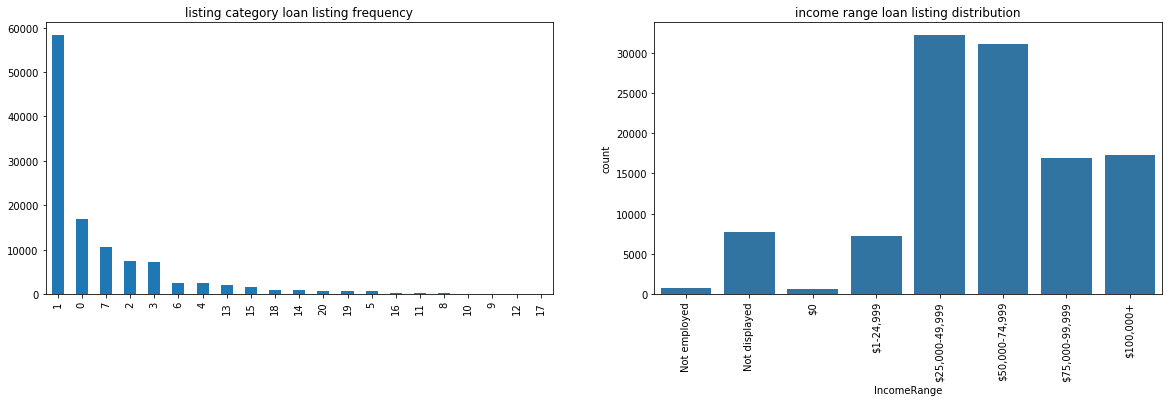

In [9]:

#renaming listing category column
loan_copy.rename(columns={'ListingCategory (numeric)':'ListingCategory'},inplace=True)
color=sb.color_palette()[0]
plt.figure(figsize=[20,5])
# plotting for listing category
plt.subplot(1,2,1)
loan_copy['ListingCategory'].value_counts().plot(kind='bar',color=color)

plt.title( 'listing category loan listing frequency')
# plotting for income category
plt.subplot(1,2,2)
sb.countplot(data=loan_copy,x='IncomeRange',color=color)
plt.xticks(rotation=90)
plt.title('income range loan listing distribution')



>. 1. The 3 most popular listing categories in the dataset are 1(51%),0(15%) and 7(9%) which stands for 'debt consolidation','not available' and 'other' respectively. The variable name had some spaces in it so it was renamed for easier referencing. No unusual entries were observed. 
 > 2. The income range with the highest number of loans are '25000-49999'(28%), '50000-74999'(27%) and '100000+'(15%). The column was also changed to category type and ordered from  'not employed' to the highest range.
###  What is the distribution of the 'lower credit score range' and 'monthly revolving accounts' (support variables)

(0, 2000)

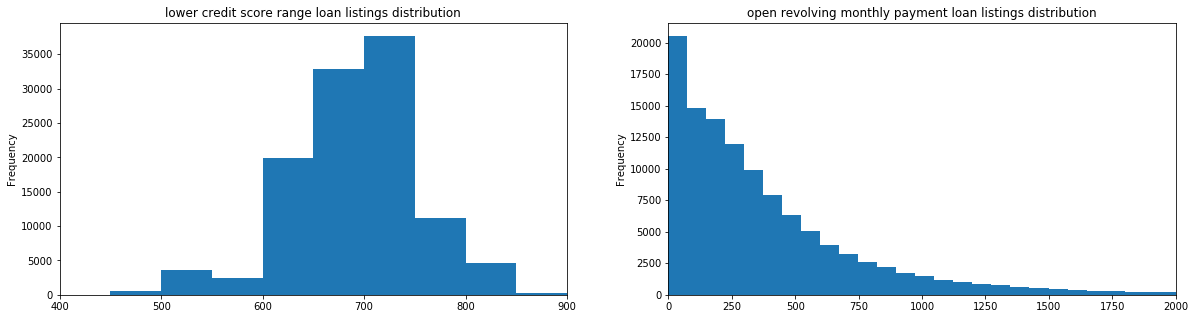

In [24]:

plt.figure(figsize=[20,5])

# plottiing for lower credit score range 
plt.subplot(1,2,1)
bins=np.arange(loan_copy.CreditScoreRangeLower.min(),loan_df.CreditScoreRangeLower.max()+50,50)
loan_copy.CreditScoreRangeLower.plot(kind='hist',bins=bins)
plt.xlim((400,900))
#plt.ylim((0,100))
plt.title('lower credit score range loan listings distribution')

# plotting for open revolving monthly payment 
plt.subplot(1,2,2)
loan_copy.OpenRevolvingMonthlyPayment.plot(kind='hist',bins=200)
plt.title('open revolving monthly payment loan listings distribution')
plt.xlim((0,2000))
#plt.ylim((0,5))


 > 1. Most of the loans in the dataset have a lower cedit score range value of between 600 and 800 with a few points spread between 400 and 600. The distribution being very left skewed however shows what looked like an oulier at 0  which after investigating appeared to be a valid credit score range (0-19).
 > 2. The open revolving monthly payment appeared to be very left skewed with over 90 percent of the points fallin between 0 and 2000 dollars but with a few other points appearing  till 14000


In [11]:
#investigating lower credit score range outlier 
print(loan_df.query('CreditScoreRangeLower < 100')[['CreditScoreRangeLower','CreditScoreRangeUpper']].shape)
loan_df.query('CreditScoreRangeLower < 100')[['CreditScoreRangeLower','CreditScoreRangeUpper','LoanOriginalAmount']].sample(15)
# it shows that there are 133 listings with lower credit score range below 100 

(133, 2)


,CreditScoreRangeLower,CreditScoreRangeUpper,LoanOriginalAmount
73152,0.0,19.0,2052
80444,0.0,19.0,4000
61268,0.0,19.0,1000
26346,0.0,19.0,2025
4430,0.0,19.0,1000
99180,0.0,19.0,1500
72889,0.0,19.0,1000
7739,0.0,19.0,2500
15093,0.0,19.0,2000
100973,0.0,19.0,3001


In [12]:
#investigating Open Revolving Monthly Payments that looks like outliers
loan_df.query('OpenRevolvingMonthlyPayment > 10000')[['OpenRevolvingMonthlyPayment','OpenRevolvingAccounts','LoanOriginalAmount']]

,OpenRevolvingMonthlyPayment,OpenRevolvingAccounts,LoanOriginalAmount
16741,14985.0,15,12000
40276,10977.0,20,25000
62274,12769.0,18,25000
85534,13765.0,3,13500


> These points look like outliers but i dont have enough knowledge about the dataset to judge if they are sppecial cases or errors.

### What is the distribution of the loan original amount variable ( main variable for question2)

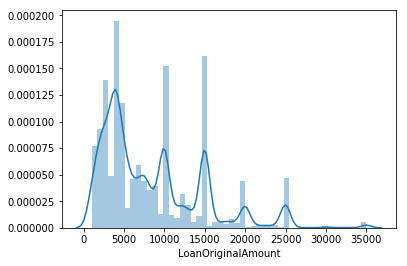

In [23]:
# showing the distribution on a histogram
sb.distplot(loan_copy.LoanOriginalAmount)

In [14]:
loan_df.LoanOriginalAmount.min(),loan_df.LoanOriginalAmount.max()

(1000, 35000)

> The chart shows a right skewed distribution with more of the loans between 1000 and 10000, and a declining number of loans up till 35000 whuch is the max loan amount. The chart also shows higher number of loans at rounded points of the loan amount 


#### Distribution for other supporting columns 

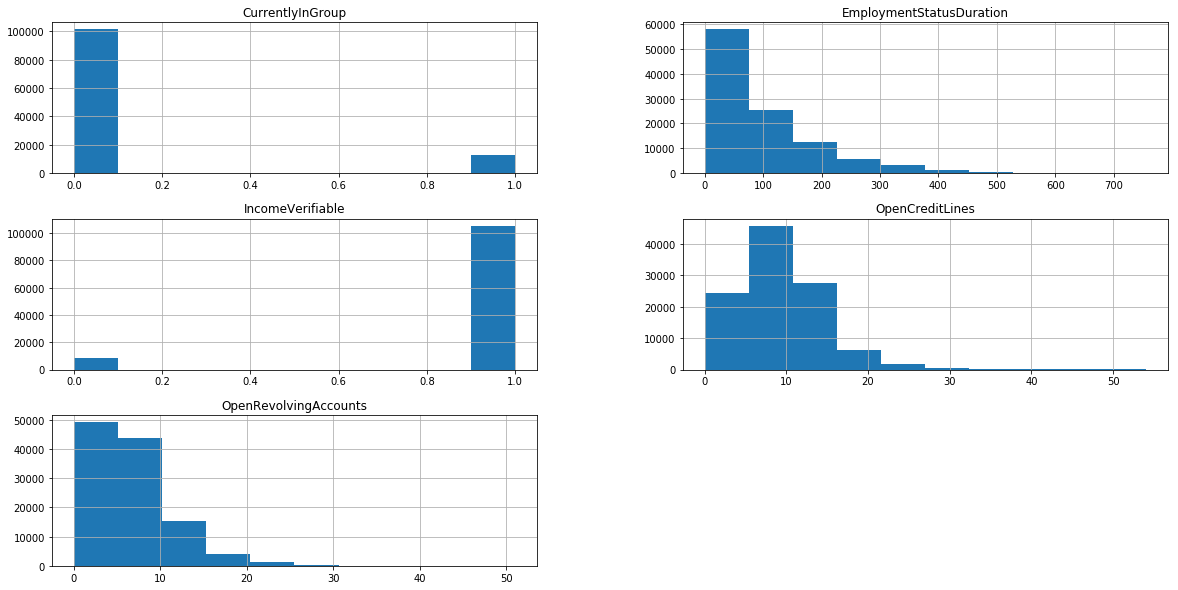

In [22]:
ColumnsOfInterest=['CurrentlyInGroup','EmploymentStatusDuration','IncomeVerifiable','OpenCreditLines','OpenRevolvingAccounts']
loan_copy.hist(layout=(3,2),figsize=(20,10),column=ColumnsOfInterest);

## Univariate exploration report<a id="Univariate_exploration_report"> 
  
###### for variables of interest (Loan Status and Loan amount) 
>About 50% of the loans are current running loans while about 33% are completed and 10% were charged off. Other categories make for the remaining less than 10 percentage. No unusual data entries were found for this variable, it however has been converted to categories data type for better classification. 
>The loan amount distribution is  right skewed with a bulk of the loan listings between 1000 and 10000 and spikes at rounded loan amount values.

### Univariate exploration report for support variables (listing category, income range, lower credit score, open revolving monthly payment, loan original amount...  
>    The above explorations shows that most of the loan were listed in the 'debt consolidation', 'others' and 'not available' categories with higher lower credit score range between 600 and 800, a higher income range between 25000 and 75000 dollars and preferrably lower revolving monthly payments as the chart shows a drastic decrease in number of  loan listing as the amount of open revolving monthly payment increases.  

>Also the number of listings reduces as the number of open credit lines surpasses 10, higher number of open revolving accounts above 10 has lesser number of listings. Higher employment status duration above 150 months sees a lower number of listings.  

>Being a home owner or not has no effect on listing chances as both actegories has almost the same number of listings, also not being in a group, and having a verifiable income sees over 90% of the listings in their respective columns.  

A few outliers were spotted from these charts:
For the lower credit score variable some listings were found having  value 0 where the listing with the next lowest value is at  450.
Also in the open revolving payments variable some listings were found to have extremely high revolving payment amounts of over 10000
    

# Bivariate exploration <p id="Bivariate_exploration"> 


#### How is the number of listing affected by the number of open credit lines and open revolving accounts 

Text(0.5,1,'Number of listings by open credit score and revolving accounts')

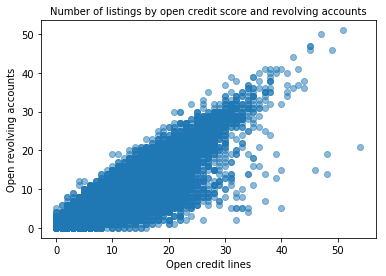

In [21]:
plt.scatter(data=loan_copy,x='OpenCreditLines',y='OpenRevolvingAccounts',alpha=.5)
plt.xlabel('Open credit lines')
plt.ylabel("Open revolving accounts")
plt.title('Number of listings by open credit score and revolving accounts',fontsize=10)


#### How is the number of loan listings affected by lower credit score range and open revolving monthly payment ?


Text(0.5,1,'effect of lower credit score range and open revolving monthly paymeny on number of listings')

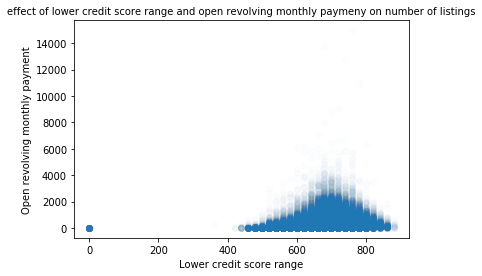

In [20]:
plt.scatter(data=loan_copy,x='CreditScoreRangeLower',y='OpenRevolvingMonthlyPayment',alpha=.01)
plt.xlabel('Lower credit score range')
plt.ylabel('Open revolving monthly payment')
plt.title('effect of lower credit score range and open revolving monthly paymeny on number of listings',fontsize=10)

This chart shows that increase in monthly revolving payments reduces the number of listings regardless of what the lower credit score amount is 
#### Relationship between income range and average employment duration?

Text(0.5,1,'Relationship between income range and average employment status duration ')

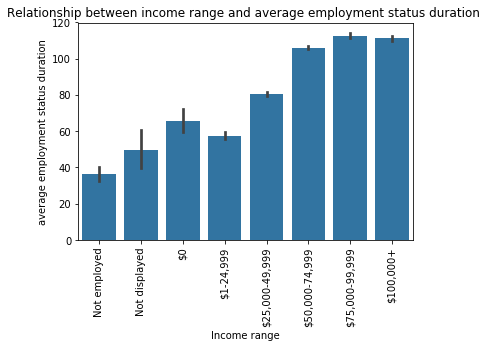

In [19]:
sb.barplot(data=loan_copy,x='IncomeRange',y='EmploymentStatusDuration',color=sb.color_palette()[0])
plt.xticks(rotation=90)
plt.xlabel('Income range')
plt.ylabel('average employment status duration')
plt.title('Relationship between income range and average employment status duration ')

> this chart shows that the average employment status duration increases with income range 



#### What is the average loan  amount across levels of  listing category, income range, lower credit score  and open revolving monthly payment variables?


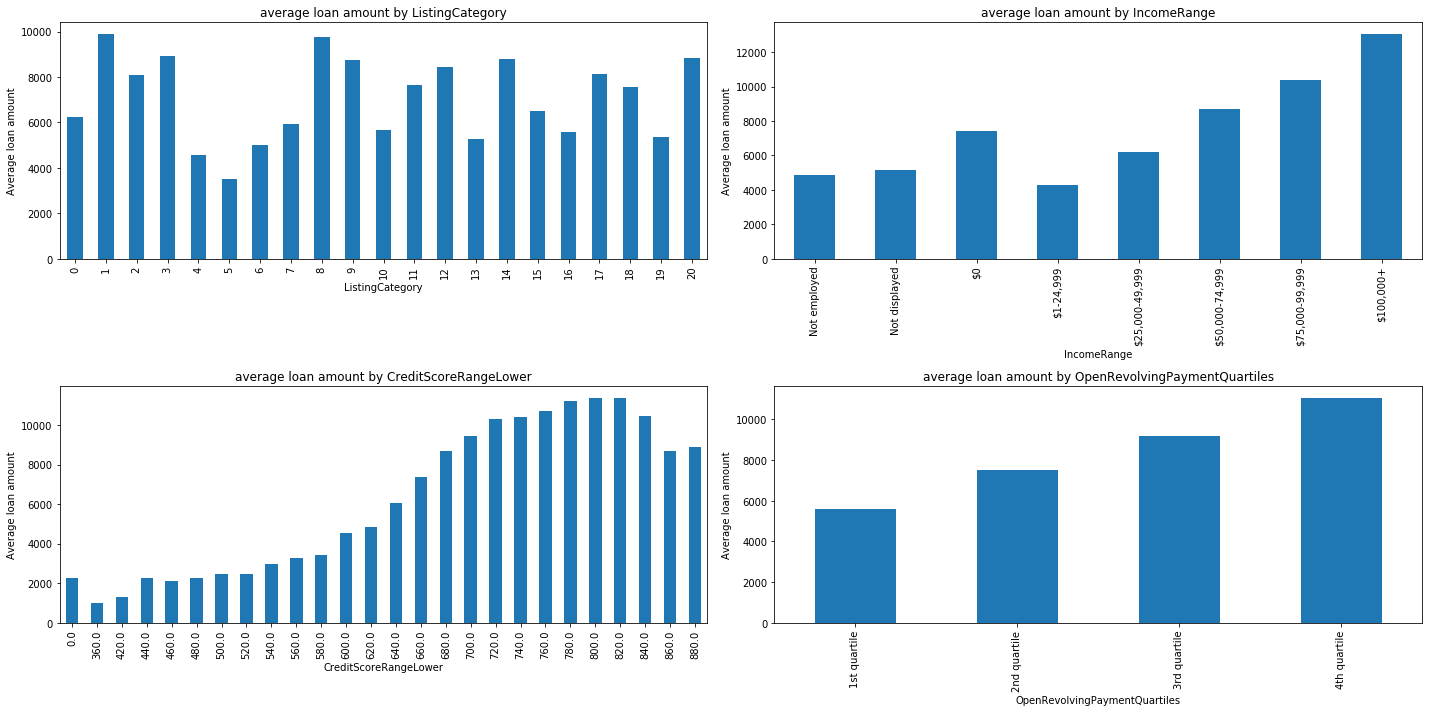

In [25]:
# making a copy of the dataframe, just incase i might need to do some quick wrangling

#plotting for average loan amount by listing category

def avg_loan (x):
    """ plots average loan amount for variable x"""
    loan_copy.groupby(x).mean()['LoanOriginalAmount'].plot(kind='bar',color=sb.color_palette()[0])
    plt.ylabel('Average loan amount')
    plt.title('average loan amount by '+ x )
plt.figure(figsize=[20,10])
plt.subplot(2,2,1)
avg_loan('ListingCategory')
# plotting for average loan amount by income range 
plt.subplot(2,2,2)
avg_loan('IncomeRange')
#plotting for average loan by lower credit score range 
plt.subplot(2,2,3)
avg_loan('CreditScoreRangeLower')
#plotting for average loan by open revolving monthly payment 
#since the monthly payment variable is continous i'll have to break it into bins to plot with my avg_loan function
# Adding a binned  monthly payment column
labels=['1st quartile','2nd quartile','3rd quartile','4th quartile']
loan_copy['OpenRevolvingPaymentQuartiles']=pd.qcut(loan_copy.OpenRevolvingMonthlyPayment,4,labels=labels)
plt.subplot(2,2,4)
avg_loan('OpenRevolvingPaymentQuartiles')
plt.tight_layout()

> Average loan appears to  increase with open 'revolving monthly payment' amount, 'lower credit score range' amount (but shows a slight drop at the top 3 points) and 'income range'('not employed' and 'not displayed' shared the same average loan amount while income range 0 has a suprisingly higher average loan amount. The chart then shows an upward trend of average loan amount from 1 to 100000 dollars of income ). <br>The listing categories with the highest average loan amounts are 'debt consolidation','baby and adoption' and 'wedding loan'.
### what is the relationship between  loan amount and borrower rate?

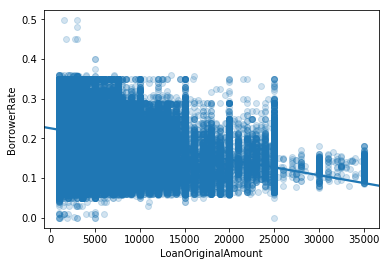

In [26]:
sb.regplot(data=loan_copy,y='BorrowerRate',x='LoanOriginalAmount',scatter_kws={'alpha':.2})

The chart shows a drop in  borrower rate as loan amount increases 
#### What is the relationship between open revolving monthly payments, loan amount and number of loan listing

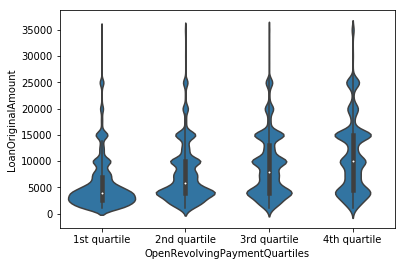

In [27]:
sb.violinplot(data=loan_copy,x='OpenRevolvingPaymentQuartiles',y='LoanOriginalAmount',color=color);


> This chart shows both a decrease in number of loan listings up the open revolving payment's quartiles and an increase in number of higher loans
### Relationship between income range and  average monthly revolving payment 

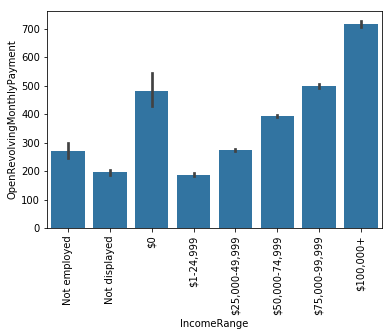

In [28]:
sb.barplot(data=loan_copy,x='IncomeRange',y='OpenRevolvingMonthlyPayment',color=color);
plt.xticks(rotation=90);

> This chart shows that average monthly revolving payment increases with income range 

### Bivariate exploration report (question 1&2)<a id="Bivariate_exploration_report"> 

> Higher open revolving payment amounts reduces number of loan listing regardless of credit score 

> Number of loan listings reduces with increase in number of open credit lines and revolving accounts

> Average loan amount increases with lower credit score amount, income range and open revolving monthly payment amount

> Number of high loan amount reduces with borrower rate

> Number of of high loan amount increases with open revolving payments 

> Employment status duration increases with income

> Number of open credit lines increases with number of open revolving accounts

> Average open monthly revolving payment increases with income range  

#  Multivariate Exploration<a id="Multivariate_Exploration"> 
### Answering question 1 (Loan listing )

#### what is the realtionship between  open credit lines, open revolving accounts and open revolving monthly payment and how does it affect loan number of listing?

Text(1,1,'How higher number of revolving accounts, credit lines and monthly payment reduces loan listing')

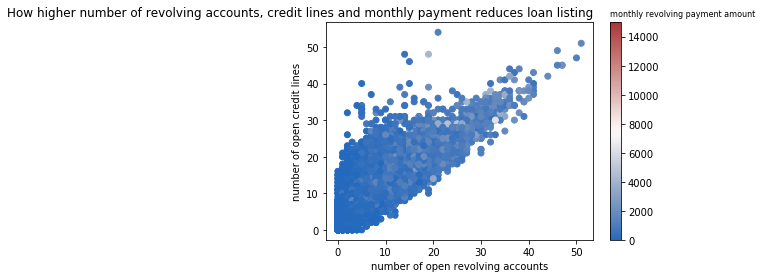

In [29]:
plt.scatter(data=loan_copy,x='OpenRevolvingAccounts',y='OpenCreditLines',c='OpenRevolvingMonthlyPayment',cmap='vlag');
clb=plt.colorbar()
clb.ax.set_title('monthly revolving payment amount',fontsize=8,loc='left')
plt.xlabel('number of open revolving accounts')
plt.ylabel('number of open credit lines')
plt.title('How higher number of revolving accounts, credit lines and monthly payment reduces loan listing',loc='right')


>This chart shows that a combined increase in number of open revolving accounts, open credit lines and monthly revolving payment amount negative impact on loan listing 
#### What is the relationship between average number of open credit line/ open revolving account and income range


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

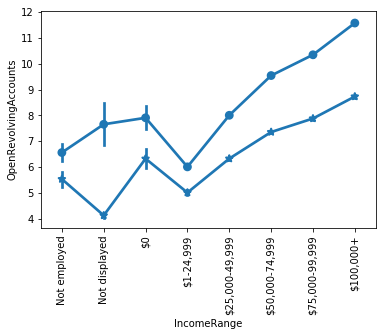

In [31]:
sb.pointplot(data=loan_copy,x='IncomeRange',y='OpenCreditLines',markers='o')
sb.pointplot(data=loan_copy,x='IncomeRange',y='OpenRevolvingAccounts',markers='*')

plt.xticks(rotation=90)

>this chart shows an increase in average number of credit lines and revolving accounts except for income range 1-24999 where it dipped a litte
#### how does the average loan amount changes across income ranges for group members and non group members

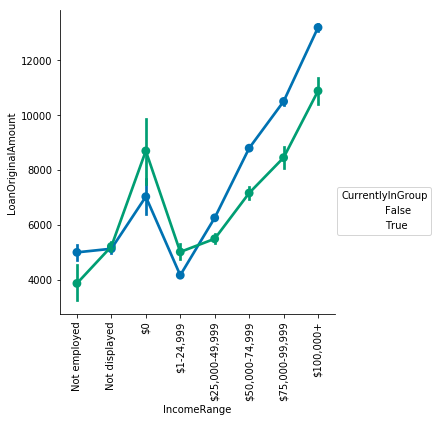

In [39]:
plt.figure(figsize=(10,20));
g=sb.FacetGrid(data=loan_copy,hue='CurrentlyInGroup',size=5,palette='colorblind');
g.map(sb.pointplot,'IncomeRange','LoanOriginalAmount',alpha=.5);
plt.xticks(rotation=90)
g.add_legend();
# stopping warnings
import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

>this chart shows that average loan amount is higher for non group members for all income range but lower for 'not employed', 'not displayed' and 0
#### How does income range  and lower credit score range affect loan amount?

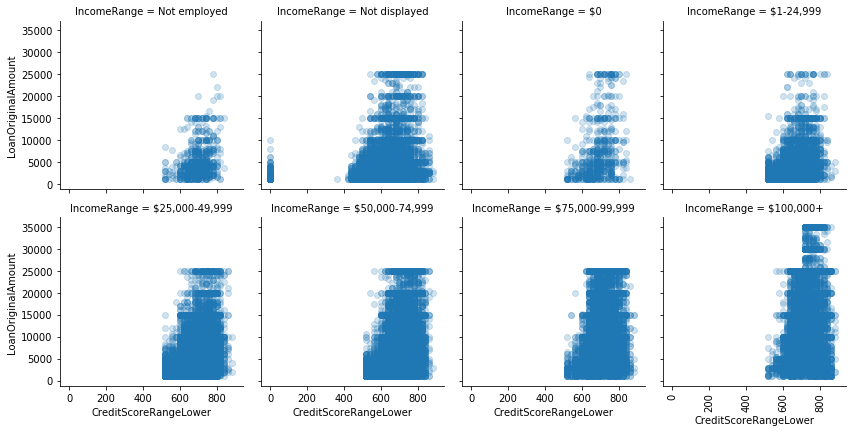

In [40]:
g=sb.FacetGrid(data=loan_copy,col='IncomeRange',col_wrap=4,sharey=True);
g.map(plt.scatter,'CreditScoreRangeLower','LoanOriginalAmount',alpha=.2);
plt.xticks(rotation=90);

> This chart shows a general increase in loan amount with increase in lower credit score range and income range. This also validates previous charts that show a positive correlation between lower credit score range and loan amount
#### QUESTION :   How does lower credit score and open revolving payments affect loan amount?

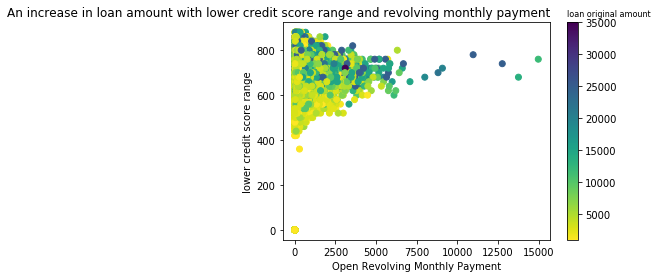

In [41]:
plt.scatter(data=loan_copy,x='OpenRevolvingMonthlyPayment',y='CreditScoreRangeLower',c='LoanOriginalAmount',cmap='viridis_r')
clb=plt.colorbar()
clb.ax.set_title('loan original amount',fontsize=8,loc='left')
plt.xlabel('Open Revolving Monthly Payment')
plt.ylabel('lower credit score range')
plt.title('An increase in loan amount with lower credit score range and revolving monthly payment',loc='right');


> The graph shows a positive correlation between lower credit score and open revolving monthly payment, and  loan amounts<br>
 More higher loans were disbursed to listings with higher lower credit score amounts and open monthly revolving amount between 0 and 5000 with a few points with high loan amounts between 5000 and 15000
 #### what level of each binary variables leads to more high loan amounts?

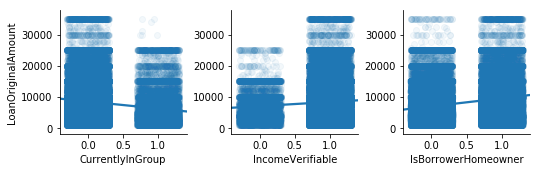

In [42]:
plt.figure(figsize=(10,10));
g=sb.PairGrid(data=loan_copy,y_vars=['LoanOriginalAmount'],x_vars=['CurrentlyInGroup','IncomeVerifiable','IsBorrowerHomeowner']);
#using a regplot with the regression line helps depict the difference easily
g.map(sb.regplot,x_jitter=.3,scatter_kws={'alpha':.05});

> This chart shows that being a home owner, having a verifiable income and not being in a group results in more high loan amounts.  
### Relationship between  income range and lower credit score range amount

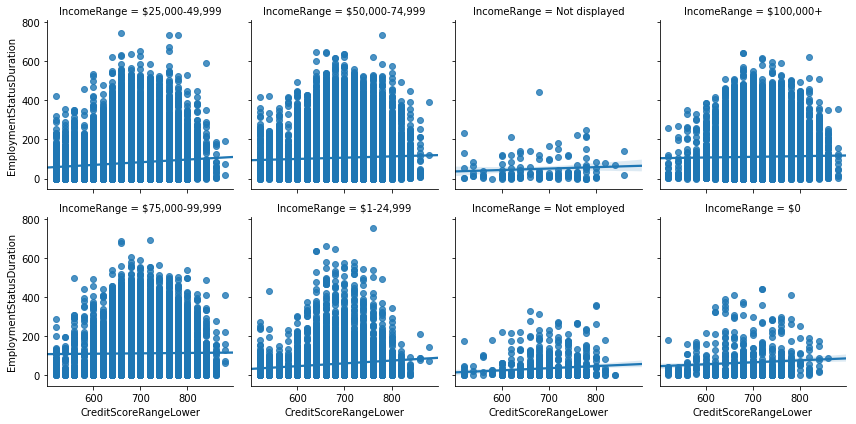

In [43]:
w=sb.FacetGrid(data=loan_df,col='IncomeRange',col_wrap=4,sharey=True);
w.map(sb.regplot,'CreditScoreRangeLower','EmploymentStatusDuration');

>This chart shows that higher income range has higher lower credit score range

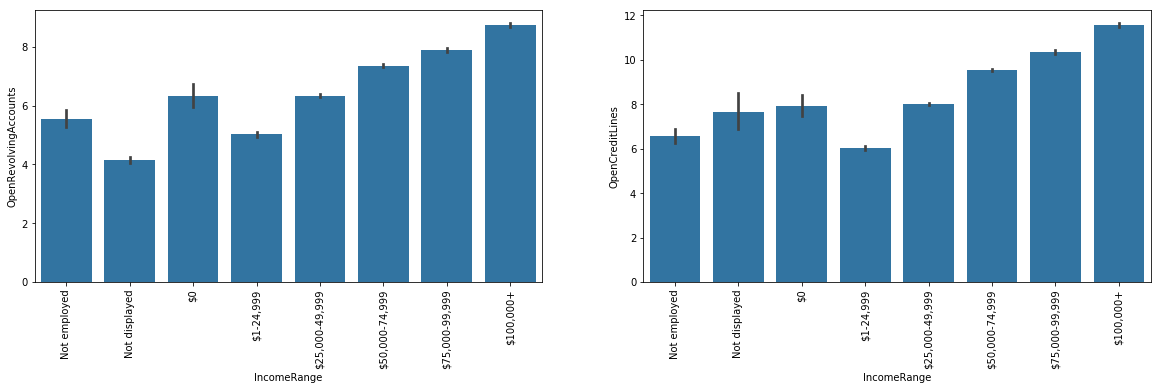

In [44]:
plt.figure(figsize=(20,5));
plt.subplot(1,2,1)
sb.barplot(data=loan_copy,x='IncomeRange',y='OpenRevolvingAccounts',color=color)
plt.xticks(rotation=90);
plt.subplot(1,2,2)
sb.barplot(data=loan_copy,x='IncomeRange',y='OpenCreditLines',color=color)
plt.xticks(rotation=90);

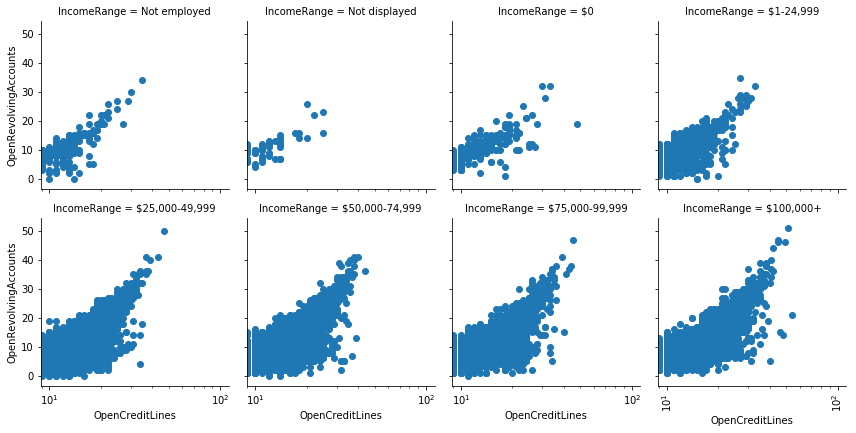

In [45]:
k=sb.FacetGrid(data=loan_copy,col='IncomeRange',col_wrap=4,sharey=True)
k.map(plt.scatter,'OpenCreditLines','OpenRevolvingAccounts')
plt.xticks(rotation=90)
plt.xscale('log')

>The chart shows that the number of loan listing reduced with higher number of open revolving accounts and open credit lines 
###  Answering question3<a id="Answering_question3">

Comparing number of completed and charged off loan per income range and listing category to see which level of each variable  has the highest loan charged off percentage.
*NB : charged off rate will be calculated by number of charged off/ number of completed+charged off instead of total number of listing per category*

### Wrangling the dataset to match analysis goal.
Since the goal of this analysis section is to compare feature of charged off loans with that of completed loans, a copy of the original dataset will be Filtered to have only loans that were charged off or completed which will leave us with about 43% of the dataset.

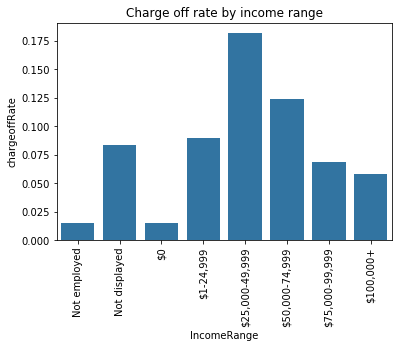

In [48]:
# Filtering out a mini dataset containing only needed variables  
columns=['LoanStatus','IncomeRange', 'ListingCategory' ]
filtered_df=loan_copy.loc[loan_copy.LoanStatus.isin(['Completed','Chargedoff']),columns]

#reshaping the filtered dataset for visualizing income range column
# getting charged off and completed counts on seperate columns
filtered_dfx=pd.melt(filtered_df,'IncomeRange','LoanStatus').groupby(['IncomeRange','value']).count().reset_index().pivot(index='IncomeRange',columns='value',values='variable')# .plot(kind='bar')

# adding chargedoff rate column
filtered_dfx['chargeoffRate']=filtered_dfx.iloc[:, filtered_dfx.columns.get_level_values('value')=='Chargedoff'].values/sum(filtered_dfx.iloc[:, filtered_dfx.columns.get_level_values('value')=='Chargedoff'].values,filtered_dfx.iloc[:, filtered_dfx.columns.get_level_values('value')=='Completed'].values)
filtered_dfx.reset_index(inplace=True)

# plotting categories by chargedoff rate 
sb.barplot(data=filtered_dfx,x=filtered_dfx.IncomeRange,y=filtered_dfx.chargeoffRate,color=sb.color_palette()[0])
plt.xticks(rotation=90)
plt.title('Charge off rate by income range');


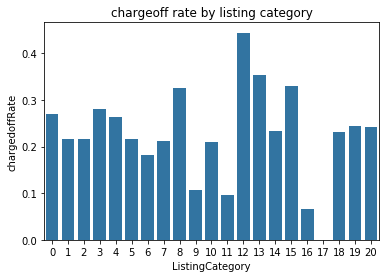

In [50]:
#reshaping the filtered dataset to visualize listing category column
# getting charged off and completed counts on seperate columns
filtered_dfy=pd.melt(filtered_df,'ListingCategory','LoanStatus').groupby(['ListingCategory','value']).count().reset_index().pivot(index='ListingCategory',columns='value',values='variable')

# adding chargedoff rate column
filtered_dfy.reset_index(inplace=True)
filtered_dfy['chargedoffRate']=filtered_dfy.Chargedoff/(filtered_dfy.Chargedoff+filtered_dfy.Completed)

# plotting categories by chargedoff rate 
sb.barplot(data=filtered_dfy,x=filtered_dfy.ListingCategory,y=filtered_dfy.chargedoffRate,color=sb.color_palette()[0])
#plt.xticks(rotation=90)
plt.title('chargeoff rate by listing category');

In [51]:
#calculating the total charge off rate for non current loans in the dataset
len(filtered_df[filtered_df.LoanStatus=='Chargedoff'])/len(filtered_df)

0.23952382854631885

### Multivariate exploration report<a id="Multivariate_exploration_report">


> Loan listing reduces with th enumber of open credit lines and revolving accounts<br>
Number of high loan amount increases with income range and lower credit score amount<br>
Number of high amount loan increases with revolving monthky payment amount and lower credit score amount<br>
Being a home owner, having a verifiable income and not being in a group results in more high loan amounts.  

#### Report on question 3 
>  The charge off rate increases across the income ranges, peaks at '25k-50k' and then drops <br>
 listing categories 'green loan', 'household expenses' and 'medical/dental' had the highest chargeoff rate 

##  Conlusions<a id="conclusions">
>After extensively exploring the datstet to the best of my ability trying to find answers to the 3 questions answer, i came up with these conclusions about the dataset.

1. when it comes to the number off loan listings, the following features are favored over their opposite
    1. Not being in a group
    2. Having a high 'lower credit score range' amount
    3. Having a verifiable income 
    4. Not having a high number of open credit lines (from 15 upwards)
    5. Not having a high number of open revolving acounts( from 10 upwards)
    6. Having a high income range(25k+)
    7. Also, loans listed for 'loan consolidation' or an undisclosed purpose(listed as 'others','not available') accounts for about 75% of the dataset and generally the dataset contains less high amount loan(10k+)
    8. Higher number of revolving accounts, credit lines and monthly payment reduces loan listing
   
2. Factors that affect loan amount
>  First thing to note is that the dataset contains more low loans amounts(1k to10k) than higher loan amounts(10k+) and very few loans over 25000.<br> Also for the most part, features that decreases number of loan listings would increase the frequency of higher loan amounts but there are some exceptions. For example in the loan listing column there isn't a huge difference in loan amount across all listing categories, the categories with the highest average loan amounts were 'debt consolidation, 'business' and 'Baby&Adoption' where Baby&Adoption had the 5th least number of loan listings and 'debt consolidation' had the highest with about 50% of all listings. Other factors that increases number of high loan amounts include:
    1. Not being in a group, being a home owner and having a verifiable income all leads to more listings and more higher amounts loan (25k+)
    2. Average loan amount increases with lower credit score range, income range and open monthly revolving payment amount
    3. A high income range(which correlated with high employment status duration) and high lower credit score leads to more high loan amounts(25K+)
    4. A high lower credit score and high open revolving monthly payment(5k+) leads to higher loan amounts(30+)
    2. An increase in borrower rate decreases number of high amount loans

3. Features with the highest charge off rate (for non current loans i.e completed and charged off )
> Income range '25k-50k' which has the highest number of loan listings and highest average loan amount happens to also have the highest chargeoff rate <br>
Listing categories with the highet number of loan listings didnt have the higest charge off rate but those with relatively smaller listings including 'green loan', 'household expenses' and 'medical/dental'. The number off charged off loans in the dataset is only about 10% of the data and 23% for non current loans(charged off and completed)



